<a href="https://colab.research.google.com/github/david-1192/Senales_y_Sistemas_2025/blob/main/YouTube_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**YouTube Detector | Cristian David Chalaca Salas**

In [1]:
#cargar datos desde drive acceso libre
FILEID = "1h_rWULdhJQTP_8k7f1hXj0tdejZgWKrb"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-11-07 01:58:22--  https://docs.google.com/uc?export=download&confirm=&id=1h_rWULdhJQTP_8k7f1hXj0tdejZgWKrb
Resolving docs.google.com (docs.google.com)... 192.178.210.100, 192.178.210.113, 192.178.210.138, ...
Connecting to docs.google.com (docs.google.com)|192.178.210.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1h_rWULdhJQTP_8k7f1hXj0tdejZgWKrb&export=download [following]
--2025-11-07 01:58:22--  https://drive.usercontent.google.com/download?id=1h_rWULdhJQTP_8k7f1hXj0tdejZgWKrb&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10603 (10K) [application/octet-stream]
Saving to: ‘canciones.xlsx’

canciones.xlsx      100%[===================>]  10.35K  --.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'canciones.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

,link,band,type,type_num
0,https://www.youtube.com/watch?v=kXYiU_JCYtU&ab...,linkinpark,rock,1
1,https://www.youtube.com/watch?v=eVTXPUF4Oz4&ab...,linkinpark,rock,1
2,https://www.youtube.com/watch?v=8sgycukafqQ&ab...,linkinpark,rock,1
3,https://www.youtube.com/watch?v=btPJPFnesV4&ab...,survivor,rock,1
4,https://www.youtube.com/watch?v=HdnTSXUWd3E&ab...,thousandfootkrutch,rock,1
5,https://www.youtube.com/watch?v=ZA7ZKB8Mo9k&ab...,feid,reggaeton,2
6,https://www.youtube.com/watch?v=zZjSX01P5dE&ab...,Jbalvin,reggaeton,2
7,https://www.youtube.com/watch?v=3X9wEwulYhk&ab...,wisin,reggaeton,2
8,https://www.youtube.com/watch?v=Ghg70fI6HLI&ab...,ozuna,reggaeton,2
9,https://www.youtube.com/watch?v=pK060iUFWXg&ab...,maluma,reggaeton,2


In [3]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

# Paquete de carga de cookies para el control anti-bots captcha
!pip install browser-cookie3

import os
import yt_dlp as youtube_dl
import browser_cookie3

try:
    cookies = browser_cookie3.firefox()
except:
    print("No se pueden descargar cookies desde firefox. Intentando Chrome...")
    try:
        cookies = browser_cookie3.chrome()
    except:
        print("No se pueden descargar cookies desde Chrome. Por favor asegúrate de estar logueado en Youtube desde tu navegador.")
        cookies = None

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':f'{name}.mp3',
    }
    if cookies:
        options['cookiefile'] = None
        options['cookiejar'] = cookies;

    with youtube_dl.YoutubeDL(options) as ydl:
        try:
            video_info = ydl.extract_info(video_url, download=False)
            ydl.download([video_info['webpage_url']])
            print("Download complete... {}".format(filename))
        except Exception as e:
            print(f"Error descargando {video_url}: {e}")

     / 2.9 MB 9.7 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.10.22-py3-none-any.whl size=3022152 sha256=f83972ed5c9c98043bb8b57902c3227fb54050d93b11e376ab4bcbe8caf5d32d
  Stored in directory: /tmp/pip-ephem-wheel-cache-9tifbg1y/wheels/b6/70/13/8d2d11b326f983030b72df6408392d5c1b3bc27a9db8b7c5b0
Successfully built yt-dlp
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.8 MB/s eta 0:00:00
No se pueden descargar cookies desde firefox. Intentando Chrome...
No se pueden descargar cookies desde Chrome. Por favor asegúrate de estar logueado en Youtube desde tu navegador.


In [4]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    try: # Added try block to catch download errors
        download_ytvid_as_mp3(X.loc[n,'link'],name_)
        #convertir a .wav
        subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                       name_+'.wav'])
    except youtube_dl.utils.DownloadError as e: # Catch the specific DownloadError
        print(f"Skipping video {X.loc[n,'link']} due to download error: {e}") # Print a message and skip

video 1 de 10
link: https://www.youtube.com/watch?v=kXYiU_JCYtU&ab_channel=LinkinPark

band: linkinpark

type: rock

[youtube] Extracting URL: https://www.youtube.com/watch?v=kXYiU_JCYtU&ab_channel=LinkinPark
[youtube] kXYiU_JCYtU: Downloading webpage


[youtube] kXYiU_JCYtU: Downloading android sdkless player API JSON
[youtube] kXYiU_JCYtU: Downloading web safari player API JSON


[youtube] kXYiU_JCYtU: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=kXYiU_JCYtU
[youtube] kXYiU_JCYtU: Downloading webpage


[youtube] kXYiU_JCYtU: Downloading android sdkless player API JSON
[youtube] kXYiU_JCYtU: Downloading web safari player API JSON


[youtube] kXYiU_JCYtU: Downloading m3u8 information


[info] kXYiU_JCYtU: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: results/linkinpark_0_1.mp3
[download] 100% of    2.76MiB in 00:00:00 at 12.81MiB/s  
Error descargando https://www.youtube.com/watch?v=kXYiU_JCYtU&ab_channel=LinkinPark: name 'filename' is not defined
video 2 de 10
link: https://www.youtube.com/watch?v=eVTXPUF4Oz4&ab_channel=LinkinPark

band: linkinpark

type: rock

[youtube] Extracting URL: https://www.youtube.com/watch?v=eVTXPUF4Oz4&ab_channel=LinkinPark
[youtube] eVTXPUF4Oz4: Downloading webpage


[youtube] eVTXPUF4Oz4: Downloading android sdkless player API JSON
[youtube] eVTXPUF4Oz4: Downloading web safari player API JSON


[youtube] eVTXPUF4Oz4: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=eVTXPUF4Oz4
[youtube] eVTXPUF4Oz4: Downloading webpage


[youtube] eVTXPUF4Oz4: Downloading android sdkless player API JSON
[youtube] eVTXPUF4Oz4: Downloading web safari player API JSON


[youtube] eVTXPUF4Oz4: Downloading m3u8 information


[info] eVTXPUF4Oz4: Downloading 1 format(s): 251
[download] Sleeping 4.00 seconds as required by the site...
[download] Destination: results/linkinpark_1_1.mp3
[download] 100% of    3.35MiB in 00:00:00 at 19.05MiB/s  
Error descargando https://www.youtube.com/watch?v=eVTXPUF4Oz4&ab_channel=LinkinPark: name 'filename' is not defined
video 3 de 10
link: https://www.youtube.com/watch?v=8sgycukafqQ&ab_channel=LinkinPark

band: linkinpark

type: rock

[youtube] Extracting URL: https://www.youtube.com/watch?v=8sgycukafqQ&ab_channel=LinkinPark
[youtube] 8sgycukafqQ: Downloading webpage


[youtube] 8sgycukafqQ: Downloading android sdkless player API JSON
[youtube] 8sgycukafqQ: Downloading web safari player API JSON


[youtube] 8sgycukafqQ: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=8sgycukafqQ
[youtube] 8sgycukafqQ: Downloading webpage


[youtube] 8sgycukafqQ: Downloading android sdkless player API JSON
[youtube] 8sgycukafqQ: Downloading web safari player API JSON


[youtube] 8sgycukafqQ: Downloading m3u8 information


[info] 8sgycukafqQ: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: results/linkinpark_2_1.mp3
[download] 100% of    3.20MiB in 00:00:00 at 13.11MiB/s  
Error descargando https://www.youtube.com/watch?v=8sgycukafqQ&ab_channel=LinkinPark: name 'filename' is not defined
video 4 de 10
link: https://www.youtube.com/watch?v=btPJPFnesV4&ab_channel=SurvivorVEVO

band: survivor

type: rock

[youtube] Extracting URL: https://www.youtube.com/watch?v=btPJPFnesV4&ab_channel=SurvivorVEVO
[youtube] btPJPFnesV4: Downloading webpage


[youtube] btPJPFnesV4: Downloading android sdkless player API JSON
[youtube] btPJPFnesV4: Downloading web safari player API JSON


[youtube] btPJPFnesV4: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=btPJPFnesV4
[youtube] btPJPFnesV4: Downloading webpage


[youtube] btPJPFnesV4: Downloading android sdkless player API JSON
[youtube] btPJPFnesV4: Downloading web safari player API JSON


[youtube] btPJPFnesV4: Downloading m3u8 information


[info] btPJPFnesV4: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: results/survivor_3_1.mp3
[download] 100% of    3.84MiB in 00:00:00 at 24.91MiB/s  
Error descargando https://www.youtube.com/watch?v=btPJPFnesV4&ab_channel=SurvivorVEVO: name 'filename' is not defined
video 5 de 10
link: https://www.youtube.com/watch?v=HdnTSXUWd3E&ab_channel=ThousandFootKrutch

band: thousandfootkrutch

type: rock

[youtube] Extracting URL: https://www.youtube.com/watch?v=HdnTSXUWd3E&ab_channel=ThousandFootKrutch
[youtube] HdnTSXUWd3E: Downloading webpage


[youtube] HdnTSXUWd3E: Downloading android sdkless player API JSON
[youtube] HdnTSXUWd3E: Downloading web safari player API JSON


[youtube] HdnTSXUWd3E: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=HdnTSXUWd3E
[youtube] HdnTSXUWd3E: Downloading webpage


[youtube] HdnTSXUWd3E: Downloading android sdkless player API JSON
[youtube] HdnTSXUWd3E: Downloading web safari player API JSON


[youtube] HdnTSXUWd3E: Downloading m3u8 information


[info] HdnTSXUWd3E: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: results/thousandfootkrutch_4_1.mp3
[download] 100% of    3.44MiB in 00:00:00 at 23.74MiB/s  
Error descargando https://www.youtube.com/watch?v=HdnTSXUWd3E&ab_channel=ThousandFootKrutch: name 'filename' is not defined
video 6 de 10
link: https://www.youtube.com/watch?v=ZA7ZKB8Mo9k&ab_channel=FeidVEVO

band: feid 

type: reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=ZA7ZKB8Mo9k&ab_channel=FeidVEVO
[youtube] ZA7ZKB8Mo9k: Downloading webpage


[youtube] ZA7ZKB8Mo9k: Downloading android sdkless player API JSON
[youtube] ZA7ZKB8Mo9k: Downloading web safari player API JSON


[youtube] ZA7ZKB8Mo9k: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=ZA7ZKB8Mo9k
[youtube] ZA7ZKB8Mo9k: Downloading webpage


[youtube] ZA7ZKB8Mo9k: Downloading android sdkless player API JSON
[youtube] ZA7ZKB8Mo9k: Downloading web safari player API JSON


[youtube] ZA7ZKB8Mo9k: Downloading m3u8 information


[info] ZA7ZKB8Mo9k: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: results/feid _5_2.mp3
[download] 100% of    3.29MiB in 00:00:00 at 21.37MiB/s  
Error descargando https://www.youtube.com/watch?v=ZA7ZKB8Mo9k&ab_channel=FeidVEVO: name 'filename' is not defined
video 7 de 10
link: https://www.youtube.com/watch?v=zZjSX01P5dE&ab_channel=jbalvinVEVO

band: Jbalvin

type: reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=zZjSX01P5dE&ab_channel=jbalvinVEVO
[youtube] zZjSX01P5dE: Downloading webpage


[youtube] zZjSX01P5dE: Downloading android sdkless player API JSON
[youtube] zZjSX01P5dE: Downloading web safari player API JSON


[youtube] zZjSX01P5dE: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=zZjSX01P5dE
[youtube] zZjSX01P5dE: Downloading webpage


[youtube] zZjSX01P5dE: Downloading android sdkless player API JSON
[youtube] zZjSX01P5dE: Downloading web safari player API JSON


[youtube] zZjSX01P5dE: Downloading m3u8 information


[info] zZjSX01P5dE: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: results/Jbalvin_6_2.mp3
[download] 100% of    3.77MiB in 00:00:00 at 26.94MiB/s  
Error descargando https://www.youtube.com/watch?v=zZjSX01P5dE&ab_channel=jbalvinVEVO: name 'filename' is not defined
video 8 de 10
link: https://www.youtube.com/watch?v=3X9wEwulYhk&ab_channel=wisinofficalVEVO

band: wisin

type: reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=3X9wEwulYhk&ab_channel=wisinofficalVEVO
[youtube] 3X9wEwulYhk: Downloading webpage


[youtube] 3X9wEwulYhk: Downloading android sdkless player API JSON
[youtube] 3X9wEwulYhk: Downloading web safari player API JSON


[youtube] 3X9wEwulYhk: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=3X9wEwulYhk
[youtube] 3X9wEwulYhk: Downloading webpage


[youtube] 3X9wEwulYhk: Downloading android sdkless player API JSON
[youtube] 3X9wEwulYhk: Downloading web safari player API JSON


[youtube] 3X9wEwulYhk: Downloading m3u8 information


[info] 3X9wEwulYhk: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: results/wisin_7_2.mp3
[download] 100% of    4.32MiB in 00:00:00 at 27.62MiB/s  
Error descargando https://www.youtube.com/watch?v=3X9wEwulYhk&ab_channel=wisinofficalVEVO: name 'filename' is not defined
video 9 de 10
link: https://www.youtube.com/watch?v=Ghg70fI6HLI&ab_channel=Klasico

band: ozuna

type: reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=Ghg70fI6HLI&ab_channel=Klasico
[youtube] Ghg70fI6HLI: Downloading webpage


[youtube] Ghg70fI6HLI: Downloading android sdkless player API JSON
[youtube] Ghg70fI6HLI: Downloading web safari player API JSON


[youtube] Ghg70fI6HLI: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=Ghg70fI6HLI
[youtube] Ghg70fI6HLI: Downloading webpage


[youtube] Ghg70fI6HLI: Downloading android sdkless player API JSON
[youtube] Ghg70fI6HLI: Downloading web safari player API JSON


[youtube] Ghg70fI6HLI: Downloading m3u8 information


[info] Ghg70fI6HLI: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: results/ozuna_8_2.mp3
[download] 100% of    3.07MiB in 00:00:00 at 22.06MiB/s  
Error descargando https://www.youtube.com/watch?v=Ghg70fI6HLI&ab_channel=Klasico: name 'filename' is not defined
video 10 de 10
link: https://www.youtube.com/watch?v=pK060iUFWXg&ab_channel=MalumaVEVO

band: maluma

type: reggaeton

[youtube] Extracting URL: https://www.youtube.com/watch?v=pK060iUFWXg&ab_channel=MalumaVEVO
[youtube] pK060iUFWXg: Downloading webpage


[youtube] pK060iUFWXg: Downloading android sdkless player API JSON
[youtube] pK060iUFWXg: Downloading web safari player API JSON


[youtube] pK060iUFWXg: Downloading m3u8 information


[youtube] Extracting URL: https://www.youtube.com/watch?v=pK060iUFWXg
[youtube] pK060iUFWXg: Downloading webpage


[youtube] pK060iUFWXg: Downloading android sdkless player API JSON
[youtube] pK060iUFWXg: Downloading web safari player API JSON


[youtube] pK060iUFWXg: Downloading m3u8 information


[info] pK060iUFWXg: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: results/maluma_9_2.mp3
[download] 100% of    4.23MiB in 00:00:00 at 14.25MiB/s  
Error descargando https://www.youtube.com/watch?v=pK060iUFWXg&ab_channel=MalumaVEVO: name 'filename' is not defined


In [5]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['survivor_3_1.wav',
 'linkinpark_1_1.wav',
 'ozuna_8_2.wav',
 'maluma_9_2.wav',
 'thousandfootkrutch_4_1.wav',
 'linkinpark_2_1.wav',
 'feid _5_2.wav',
 'wisin_7_2.wav',
 'linkinpark_0_1.wav',
 'Jbalvin_6_2.wav']

In [6]:
import soundfile as sf # para instalar pip install soundfile
from scipy.signal import resample_poly
import numpy as np
import os

#leer archivos y crear np.array audios
fs = 48000
tl = np.array([30,40,50,60,70,80]) #puntos lectura
ts = 5 #t segmento
# The total number of samples for each segment at the target fs
segment_length_fs = int(ts * fs)
Ns = len(wav_files)*len(tl) #cantidad segmentos
# x_t should be initialized with the shape corresponding to the target fs
x_t = np.zeros((Ns, segment_length_fs, 2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
type_c = X['type'].unique()
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs_i = sf.read(path+name)
    # Ensure x is at least 2D (for stereo)

    if x.ndim == 1:
        x = np.expand_dims(x, axis=1) # Add a channel dimension if mono
    if x.shape[1] == 1: # If still mono after expand_dims
        x = np.repeat(x, 2, axis=1) # Convert mono to stereo by repeating the channel

    # Check if the audio file has enough data for the requested segments
    if len(x) < int(fs_i * (tl[-1] + ts)):
        print(f"Warning: File {name} is too short for all requested segments. Skipping some segments.")
        valid_tl = tl[tl + ts <= len(x)/fs_i]
    else:
        valid_tl = tl

    for ti in valid_tl: #segmentos de tiempo
        print(name,'x',x.shape,'fs actual:',fs_i)

        # Slice based on the original sampling rate fs_i
        start_sample = int(fs_i * ti)
        end_sample = int(fs_i * (ti + ts))
        xc = x[start_sample:end_sample, :]

        # Check if the sliced segment has enough data for resampling
        # This can happen if the calculated end_sample exceeds the actual audio length
        if xc.shape[0] < int(ts * fs_i):
            print(f"Warning: Segment from {ti}s to {ti+ts}s in {name} is shorter than expected. Skipping.")
            continue # Skip this segment

        if fs_i != fs:

            gcd_val = np.gcd(fs, fs_i)
            up_val = fs // gcd_val
            down_val = fs_i // gcd_val

            # Resample each channel separately
            xc_resampled_ch1 = resample_poly(xc[:, 0], up=up_val, down=down_val)
            xc_resampled_ch2 = resample_poly(xc[:, 1], up=up_val, down=down_val)

            # Combine channels
            xc_resampled = np.stack((xc_resampled_ch1, xc_resampled_ch2), axis=-1)

            # Ensure the resampled segment has the target length (segment_length_fs)
            if xc_resampled.shape[0] > segment_length_fs:
                xc_resampled = xc_resampled[:segment_length_fs, :]
            elif xc_resampled.shape[0] < segment_length_fs:
                # Pad with zeros if shorter
                padding = np.zeros((segment_length_fs - xc_resampled.shape[0], 2))
                xc_resampled = np.vstack((xc_resampled, padding))

            xc = xc_resampled # Use the resampled array
            print(f"Resampled to shape: {xc.shape}")

        # Now xc should have the shape (segment_length_fs, 2) which is (240000, 2)
        if xc.shape[0] != segment_length_fs:
             print(f"Error: Resampled segment has incorrect length {xc.shape[0]}. Expected {segment_length_fs}. Skipping.")
             continue # Skip this segment if resampling failed to produce correct length


        x_t[i] = xc

        try:
             # Extract type_num from the filename
             parts = name.split('_')
             type_num_str = parts[-1].split('.')[0]
             label[i] = int(type_num_str)
        except (IndexError, ValueError):
             print(f"Warning: Could not extract type_num from filename {name}. Setting label to 0.")
             label[i] = 0 # Assign a default or error label

        # The name_c logic also seems to assume the filename format.
        # Sticking to original logic.
        name_c += [name[:-4]] # Remove '.wav' from the end


        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música: {type_c[int(label[i])-1]}")
        i+=1


effective_Ns = i
x_t = x_t[:effective_Ns]
label = label[:effective_Ns]
name_c = name_c[:effective_Ns]

x_t.shape

survivor_3_1.wav x (11752448, 2) fs actual: 48000
0 lectura: survivor_3_1.wav; segundo 30:35; tipo música: rock
survivor_3_1.wav x (11752448, 2) fs actual: 48000
1 lectura: survivor_3_1.wav; segundo 40:45; tipo música: rock
survivor_3_1.wav x (11752448, 2) fs actual: 48000
2 lectura: survivor_3_1.wav; segundo 50:55; tipo música: rock
survivor_3_1.wav x (11752448, 2) fs actual: 48000
3 lectura: survivor_3_1.wav; segundo 60:65; tipo música: rock
survivor_3_1.wav x (11752448, 2) fs actual: 48000
4 lectura: survivor_3_1.wav; segundo 70:75; tipo música: rock
survivor_3_1.wav x (11752448, 2) fs actual: 48000
5 lectura: survivor_3_1.wav; segundo 80:85; tipo música: rock


/tmp/ipython-input-689873967.py:96: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música: {type_c[int(label[i])-1]}")


linkinpark_1_1.wav x (10474496, 2) fs actual: 48000
6 lectura: linkinpark_1_1.wav; segundo 30:35; tipo música: rock
linkinpark_1_1.wav x (10474496, 2) fs actual: 48000
7 lectura: linkinpark_1_1.wav; segundo 40:45; tipo música: rock
linkinpark_1_1.wav x (10474496, 2) fs actual: 48000
8 lectura: linkinpark_1_1.wav; segundo 50:55; tipo música: rock
linkinpark_1_1.wav x (10474496, 2) fs actual: 48000
9 lectura: linkinpark_1_1.wav; segundo 60:65; tipo música: rock
linkinpark_1_1.wav x (10474496, 2) fs actual: 48000
10 lectura: linkinpark_1_1.wav; segundo 70:75; tipo música: rock
linkinpark_1_1.wav x (10474496, 2) fs actual: 48000
11 lectura: linkinpark_1_1.wav; segundo 80:85; tipo música: rock
ozuna_8_2.wav x (8982222, 2) fs actual: 48000
12 lectura: ozuna_8_2.wav; segundo 30:35; tipo música: reggaeton
ozuna_8_2.wav x (8982222, 2) fs actual: 48000
13 lectura: ozuna_8_2.wav; segundo 40:45; tipo música: reggaeton
ozuna_8_2.wav x (8982222, 2) fs actual: 48000
14 lectura: ozuna_8_2.wav; segundo

(60, 240000, 2)

In [7]:
from IPython.display import Audio #reproducir segmento
i = 0
Audio(x_t[i].T,rate=fs)

In [8]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(60, 120001)

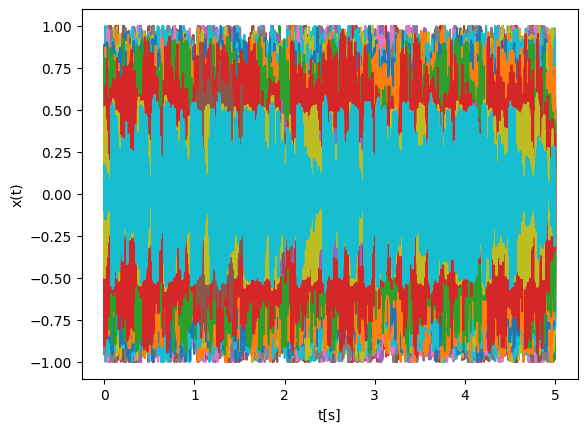

In [9]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

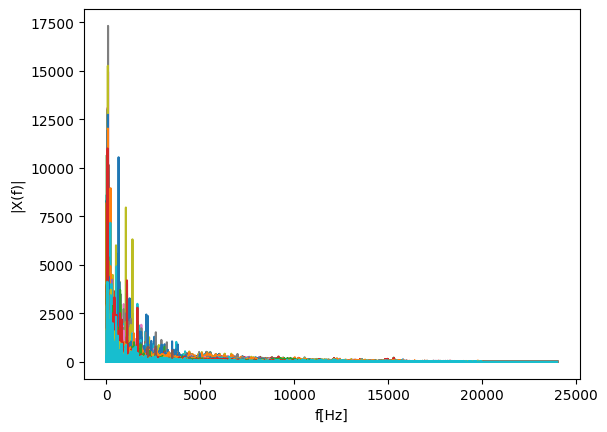

In [10]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

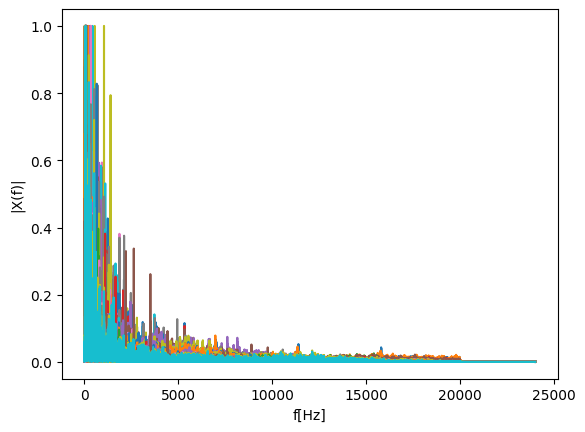

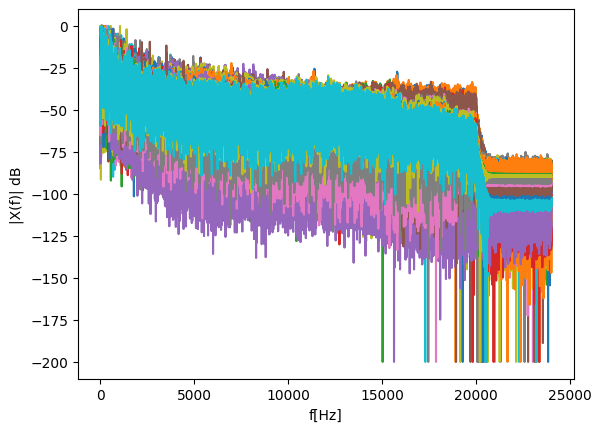

In [11]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

**Nota**: Generalmente el espectro se presenta en [decibeles [dB]](https://es.wikipedia.org/wiki/Decibelio)

## Visualización de los datos en 2D

In [12]:
from umap import UMAP
#visualización de datos
n_neighbors = int(2*np.sqrt(Xw_.shape[0]))
sca_ = MinMaxScaler()

red_ = UMAP(n_components=2,n_neighbors=n_neighbors)
X_2D = sca_.fit_transform(red_.fit_transform(Xw_))

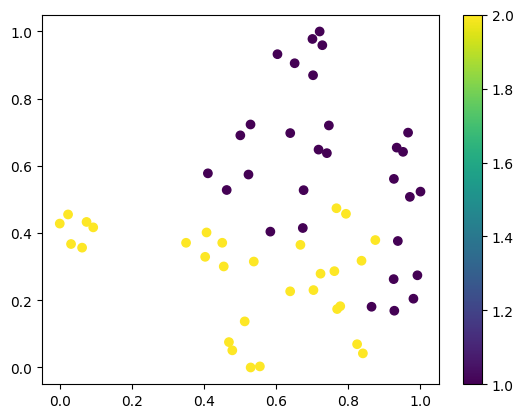

/tmp/ipython-input-2468643273.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


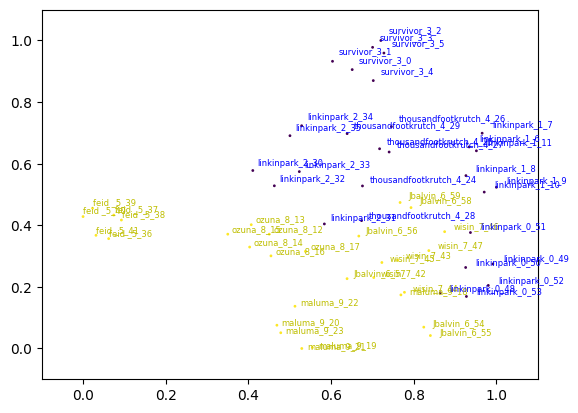

In [13]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

In [14]:
#reproducir audio
i = 1
Audio(x_t[i].T,rate=fs)

# Predicción del género musical sobre espectro de Fourier

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del clasificador RandomForest
model = KNeighborsClassifier(n_neighbors=5)

# Realizar la validación cruzada
# Xw_ son tus características y label son tus etiquetas
# cv define el número folds para la validación cruzada
scores = cross_val_score(model, Xw_, label.ravel(), cv=5,scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Acierto para cada Fold:", scores)
print("Acierto promedio:", scores.mean())
print("Desviación estándar del Acierto:", scores.std())

#entrenar modelo para predecir nuevas canciones
model.fit(Xw_, label.ravel())

Acierto para cada Fold: [0.5        0.75       0.5        0.33333333 0.25      ]
Acierto promedio: 0.4666666666666667
Desviación estándar del Acierto: 0.17159383568311665


KNeighborsClassifier()

In [16]:
import joblib
#guardar modelo
try:
  os.mkdir('modelo')
except:
  print("Carpeta modelo ya existe")

filename_ = 'modelo/reggaeton_vs_metal'
model_ ={'Xw_':Xw_, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs, 'modelo':model,'type':X['type'].unique()}
joblib.dump(model_,filename_+".pkl")


['modelo/reggaeton_vs_metal.pkl']

In [17]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Para una nueva canción

In [18]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()

dict_keys(['Xw_', 'label', 'name_c', 'vf', 'fs', 'modelo', 'type'])

In [19]:
#evaluar para un segmento en fft normalizado

pred_ = my_model_loaded['modelo'].predict(Xw_[0].reshape(1,-1))[0]
print('Etiqueta estimada: ',my_model_loaded['type'][int(pred_-1)])
print('Etiqueta orignal: ',my_model_loaded['type'][int(my_model_loaded['label'][0][0])-1])

Etiqueta estimada:  rock
Etiqueta orignal:  rock
